In [1]:
# Diabetes Risk Prediction
# Group Number – 67
# EG/2020/4112 Perara H.L.D.U.G.
# EG/2020/4146 Ranaweera R.A.P.I.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('data/diabetes_prediction_dataset.csv')

In [4]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [8]:
df['heart_disease'].value_counts()

heart_disease
0    96058
1     3942
Name: count, dtype: int64

In [9]:
df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

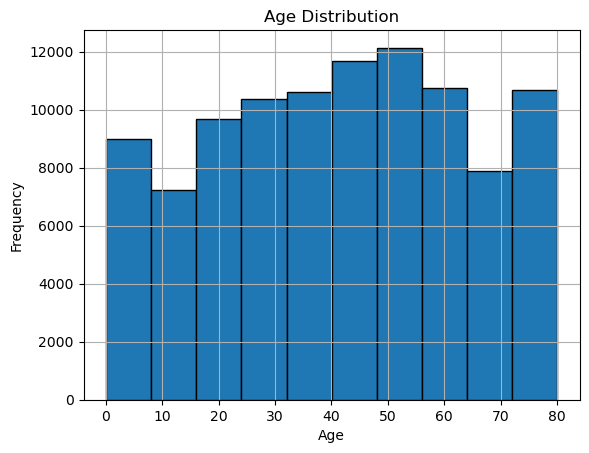

In [10]:
# Plotting histogram for 'age'
plt.hist(df['age'], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.grid(True)
plt.show()

In [11]:
# Extract numerical columns for normalization
numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Apply Min-Max scaling to the numerical columns
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

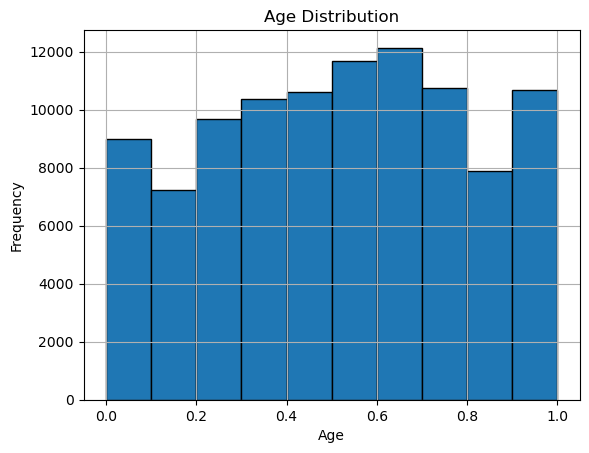

In [12]:
# Plotting histogram for 'age'
plt.hist(df['age'], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.grid(True)
plt.show()

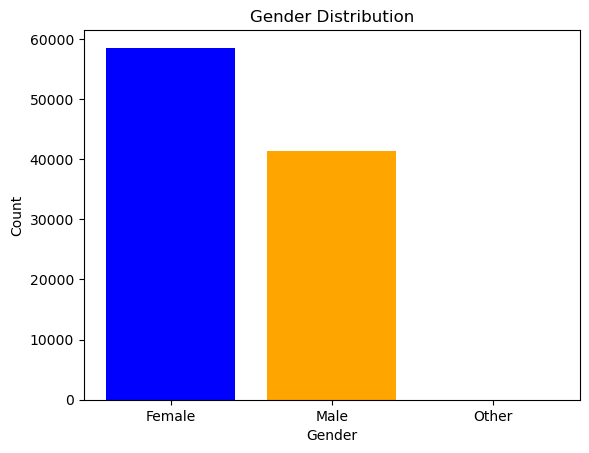

In [13]:
# Extracting data for plotting
genders = ['Female', 'Male', 'Other']
counts = df['gender'].value_counts()

# Plotting the bar graph
plt.bar(genders, counts, color=['blue', 'orange', 'green'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

In [14]:
df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

c:\Users\umesh\.conda\envs\ML\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\umesh\.conda\envs\ML\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\umesh\.conda\envs\ML\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\umesh\.conda\envs\ML\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if

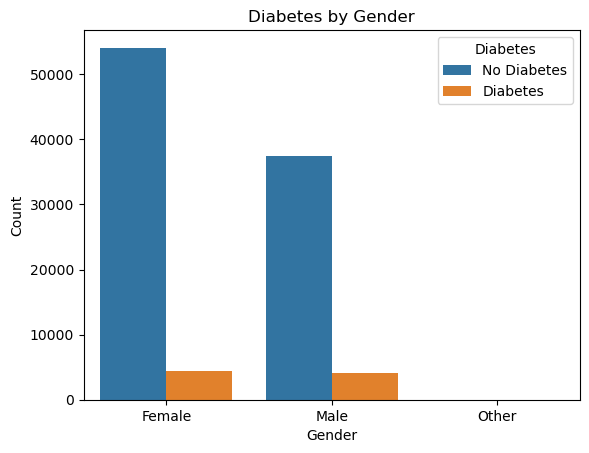

In [15]:
# Plotting a count plot

# fix Seaborn count plot error that there's a problem with the data type or format of the 'diabetes' column
df['diabetes'] = df['diabetes'].astype(str)



sns.countplot(x='gender', hue='diabetes', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Diabetes by Gender')
plt.legend(title='Diabetes', labels=['No Diabetes', 'Diabetes'])
plt.show()

In [16]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,1.000000,0,1,never,0.177171,0.563636,0.272727,0
1,Female,0.674675,0,0,No Info,0.202031,0.563636,0.000000,0
2,Male,0.349349,0,0,never,0.202031,0.400000,0.354545,0
3,Female,0.449449,0,0,current,0.156863,0.272727,0.340909,0
4,Male,0.949950,1,1,current,0.118231,0.236364,0.340909,0


In [17]:
# One-hot encode 'gender'
df = pd.get_dummies(df, columns=['gender'], drop_first=True)
df.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other
0,1.000000,0,1,never,0.177171,0.563636,0.272727,0,False,False
1,0.674675,0,0,No Info,0.202031,0.563636,0.000000,0,False,False
2,0.349349,0,0,never,0.202031,0.400000,0.354545,0,True,False
3,0.449449,0,0,current,0.156863,0.272727,0.340909,0,False,False
4,0.949950,1,1,current,0.118231,0.236364,0.340909,0,True,False


In [18]:
df['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [19]:
# Label encoding
df.replace({'smoking_history':{'No Info':0,'never':1,'former':2,'current':3,'not current':4,'ever':5}},inplace=True)
df.tail()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other
99995,1.000000,0,0,0,0.202031,0.490909,0.045455,0,False,False
99996,0.024024,0,0,0,0.085901,0.545455,0.090909,0,False,False
99997,0.824825,0,0,2,0.207983,0.400000,0.340909,0,True,False
99998,0.299299,0,0,1,0.296569,0.090909,0.090909,0,False,False
99999,0.712212,0,0,3,0.144958,0.563636,0.045455,0,False,False


In [20]:
df['diabetes'] = df['diabetes'].astype('category')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   age                  100000 non-null  float64 
 1   hypertension         100000 non-null  int64   
 2   heart_disease        100000 non-null  int64   
 3   smoking_history      100000 non-null  int64   
 4   bmi                  100000 non-null  float64 
 5   HbA1c_level          100000 non-null  float64 
 6   blood_glucose_level  100000 non-null  float64 
 7   diabetes             100000 non-null  category
 8   gender_Male          100000 non-null  bool    
 9   gender_Other         100000 non-null  bool    
dtypes: bool(2), category(1), float64(4), int64(3)
memory usage: 5.6 MB


In [22]:
# x & y and Train Test Splitting
y = df['diabetes']
x = df.drop(['diabetes'],axis=1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [23]:
# performance of a classification model
def training_score(y_act, y_predict):
    acc = round(accuracy_score(y_act, y_predict), 3)
    pr = round(precision_score(y_act, y_predict, pos_label='1'), 3) 
    rec = round(recall_score(y_act, y_predict, pos_label='1'), 3) 
    f1 = round(f1_score(y_act, y_predict, pos_label='1'), 3) 
    return acc, pr, rec, f1


<h2>Logistic Regression

In [24]:
# Liner Regression Model
model_LGR = LogisticRegression(solver='liblinear', random_state=0)

In [25]:
model_LGR.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [26]:
y_pred = model_LGR.predict(x_test)

In [27]:
y_train_predict = model_LGR.predict(x_train)
training_score(y_train, y_train_predict)

(0.96, 0.88, 0.616, 0.725)

In [28]:
score_LGR = accuracy_score(y_test,y_pred)
report_LGR = classification_report(y_test, y_pred)

In [29]:
print("Accuracy:", score_LGR)
print("Classification Report:\n", report_LGR)

Accuracy: 0.9601
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18297
           1       0.86      0.63      0.73      1703

    accuracy                           0.96     20000
   macro avg       0.91      0.81      0.85     20000
weighted avg       0.96      0.96      0.96     20000



GridSearchCV

In [30]:
param_grid_LGR = {'C':[0.1, 1, 10],
             'penalty':['l1', 'l2', 'elasticnet']}

In [31]:
grid_search_LGR = GridSearchCV(estimator=model_LGR, param_grid=param_grid_LGR)
grid_search_LGR.fit(x_train, y_train)


c:\Users\umesh\.conda\envs\ML\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\umesh\.conda\envs\ML\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\umesh\.conda\envs\ML\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\umesh\.conda\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _check_solver(self.solver, self

GridSearchCV(estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid={'C': [0.1, 1, 10],
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [32]:
grid_search_LGR.best_params_

{'C': 0.1, 'penalty': 'l1'}

In [33]:
grid_search_LGR.score(x_test, y_test)

0.96035

<h2>Decision Tree<h2>

In [34]:
# Decision Tree model
model_DT = DecisionTreeClassifier(random_state=0)

In [35]:
# Train the model
model_DT.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [36]:
y_train_predict = model_DT.predict(x_train)
training_score(y_train, y_train_predict)

(0.999, 1.0, 0.989, 0.995)

In [37]:
# Predictions
y_pred = model_DT.predict(x_test)

In [38]:
# Model evaluation
accuracy_DT = accuracy_score(y_test, y_pred)
report_DT = classification_report(y_test, y_pred)

In [39]:
print("Accuracy:", accuracy_DT)
print("Classification Report:\n", report_DT)

Accuracy: 0.951
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     18297
           1       0.70      0.74      0.72      1703

    accuracy                           0.95     20000
   macro avg       0.84      0.85      0.85     20000
weighted avg       0.95      0.95      0.95     20000



GridSearchCV

In [40]:
param_grid_DT = {'criterion':['gini', 'entropy', 'log_loss'],
             'splitter':['best', 'random']}

In [41]:
grid_search_DT = GridSearchCV(estimator=model_DT, param_grid=param_grid_DT)
grid_search_DT.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'splitter': ['best', 'random']})

In [42]:
grid_search_DT.best_params_

{'criterion': 'gini', 'splitter': 'best'}

In [43]:
grid_search_DT.score(x_test, y_test)

0.951